<a href="https://colab.research.google.com/github/farimaahchz/05-Shark-Attack/blob/main/05_Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **01- Importig necessary modules**

---



In [619]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## **02- importing CSV file from the dataset**


---



In [620]:
# Load the dataset, using encoding='cp1252' to be able to read the csv

df = pd.read_csv( 'https://raw.githubusercontent.com/farimaahchz/05-Shark-Attack/main/Shark_attack_CSV/attacks.csv', encoding='cp1252')
print(df.shape)
display(df)
df.columns

(25723, 24)


Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# **03- General cleaning**

---



first thing we need to do is clean and organize our data to prepare it for analysing and answering the requested questions.

a. Columns: renaming columns to read the file easier and dropping unnecssary columns which do not have any effect on our analyse.

b. Rows: Since the data has a lot of rows with empyt values, we are going to remove them as they can not drive us to any proper results.



In [621]:
#a. cleaning original data frame from unrelated columns
new_df = df.drop(columns=['Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'])

#renaming columns
new_df.columns = ['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species']
new_df.columns
#new_df.shape

#b. deleting duplicate rows
new_df = new_df.drop_duplicates(subset=list(new_df.columns))
#print(new_df.shape)

new_df = new_df.dropna(how="all")
#new_df

# rows with index 6302 and 25722 are also can't give us any information, as they have NAN, (0 in case number and XX) we are going to remove them as well.

new_df = new_df.drop([new_df.index[6302], df.index[25722]])
print(new_df.shape)
print(new_df.columns)
display(new_df)

(6302, 15)
Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species'],
      dtype='object')


case number         date    year        type             country  \
0     2018.06.25  25-Jun-2018  2018.0     Boating                 USA   
1     2018.06.18  18-Jun-2018  2018.0  Unprovoked                 USA   
2     2018.06.09  09-Jun-2018  2018.0     Invalid                 USA   
3     2018.06.08  08-Jun-2018  2018.0  Unprovoked           AUSTRALIA   
4     2018.06.04  04-Jun-2018  2018.0    Provoked              MEXICO   
...          ...          ...     ...         ...                 ...   
6297     ND.0005  Before 1903     0.0  Unprovoked           AUSTRALIA   
6298     ND.0004  Before 1903     0.0  Unprovoked           AUSTRALIA   
6299     ND.0003    1900-1905     0.0  Unprovoked                 USA   
6300     ND.0002    1883-1889     0.0  Unprovoked              PANAMA   
6301     ND.0001    1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                   area                             location      activity  \
0            California          Oceanside, San Diego County      Paddling   
1               Georgia       St. Simon Island, Glynn County      Standing   
2                Hawaii                         Habush, Oahu       Surfing   
3       New South Wales                   Arrawarra Headland       Surfing   
4                Colima                             La Ticla   Free diving   
...                 ...                                  ...           ...   
6297  Western Australia                          Roebuck Bay        Diving   
6298  Western Australia                                  NaN  Pearl diving   
6299     North Carolina                       Ocracoke Inlet      Swimming   
6300                NaN                 Panama Bay 8ºN, 79ºW           NaN   
6301   Eastern Province  Below the English fort, Trincomalee      Swimming   

                       name sex  age  \
0               Julie Wolfe   F   57   
1           Adyson McNeely    F   11   
2               John Denges   M   48   
3                      male   M  NaN   
4            Gustavo Ramos    M  NaN   
...                     ...  ..  ...   
6297                   male   M  NaN   
6298                  Ahmun   M  NaN   
6299  Coast Guard personnel   M  NaN   
6300        Jules Patterson   M  NaN   
6301                   male   M   15   

                                                 injury fatal(y/n)  \
0     No injury to occupant, outrigger canoe and pad...          N   
1                            Minor injury to left thigh          N   
2          Injury to left lower leg from surfboard skeg          N   
3                             Minor injury to lower leg          N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT          N   
...                                                 ...        ...   
6297                                              FATAL          Y   
6298                                              FATAL          Y   
6299                                              FATAL          Y   
6300                                              FATAL          Y   
6301  FATAL. "Shark bit him in half, carrying away t...          Y   

               time          species  
0             18h00      White shark  
1     14h00  -15h00              NaN  
2             07h45              NaN  
3               NaN        2 m shark  
4               NaN  Tiger shark, 3m  
...             ...              ...  
6297            NaN              NaN  
6298            NaN              NaN  
6299            NaN              NaN  
6300            NaN              NaN  
6301            NaN              NaN  

[6302 rows x 15 columns]

In [622]:
#detecting missing values in new dataframe
new_df.isnull().sum()

case number       1
date              0
year              2
type              4
country          50
area            455
location        540
activity        544
name            210
sex             565
age            2831
injury           28
fatal(y/n)      539
time           3354
species        2838
dtype: int64

# **04- Answering questions:**

---

## **1- What are the most dangerous types of sharks to humans?**

To answer this question, we first need to define the concept of "the most dangerous". By reading the information provided in the dataset's description, it has been highlighted that only a small percentage of shark species are considered potentially dangerous to humans due to their size and dentition. For this reason, focusing on fatal attacks would provide us insights into the most dangerous shark species.

We need to look at the columns 'fatal(y/n)'and 'species' to see which shark types caused the most deaths!

In [623]:
#a. handling 'fatal(y/n)' column :
new_df.loc[:, 'fatal(y/n)']. unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [624]:
# treating '2017', and 'M' as NaN, as these values are missing and their presence does not provide meaningful information for the analysis.
new_df['fatal(y/n)'].replace('y', 'Y', inplace = True)
values_to_replace = ['2017', 'M']
new_df['fatal(y/n)'] = new_df['fatal(y/n)'].replace(values_to_replace, np.nan).str.strip()
new_df['fatal(y/n)'] = new_df['fatal(y/n)'].fillna('UNKNOWN')

print(new_df['fatal(y/n)'].unique())
print(new_df['fatal(y/n)'].value_counts())

['N' 'Y' 'UNKNOWN']
N          4301
Y          1389
UNKNOWN     612
Name: fatal(y/n), dtype: int64


In [625]:
#b. handling'species' column:
new_df.loc[:, 'species'].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

In [626]:
#filling the missing values with unknown
new_df['species'] = new_df['species'].replace('invalid', np.nan)
new_df['species'] = new_df['species'].str.lower()

#adding a new column to data frame
new_df['new_species'] = None
#defining a pattern to extract the shark species using regualr expression pattern method:
pattern = r'\b(?:white shark|tiger shark|bull shark|hammerhead shark|lemon shark|blue shark|mako shark|sand tiger shark|blacktip shark|nurse shark|reef shark|whale shark|zambezi shark|thresher shark|goblin shark)\b'

#organizing names of species with applying the pattern on a new column
new_df['new_species']= new_df['species'].str.extract(f'({pattern})', flags=re.IGNORECASE)
new_df['new_species'] = new_df['new_species'].fillna('unknown')
new_df.loc[:, 'new_species'].value_counts(dropna=False)

unknown             4835
white shark          630
tiger shark          257
bull shark           172
nurse shark           97
reef shark            65
blacktip shark        63
mako shark            54
hammerhead shark      42
blue shark            38
lemon shark           37
thresher shark         4
whale shark            3
zambezi shark          3
goblin shark           2
Name: new_species, dtype: int64

In [649]:
#c.filtering the data frame by finding the valid species where fatal is "yes" to see how frequent are the fatal attacks by certain type of sharks.
fatal_sharks = new_df[new_df['fatal(y/n)'] == 'Y']['new_species']
fatal_sharks = fatal_sharks.replace('unknown', np.nan)
most_dangerous = fatal_sharks.value_counts()

# Create a DataFrame with species and counts
fatal_sharks = pd.DataFrame({'counts': most_dangerous})
fatal_sharks.rename_axis('species', inplace=True)
fatal_sharks



counts
species                 
white shark          141
tiger shark           68
bull shark            35
blue shark             6
mako shark             2
hammerhead shark       1
nurse shark            1

It is important to acknowledge that there is a considerable number of fatal attacks with unknown species (approximately 1135), which means it could potentially impact our results and introduce bias. Without knowing the specific species involved, we cannot accurately determine their level of danger to humans.

However, among the identified species in our dataset, the most dangerous type of Sharks to human are following:
It is important to acknowledge that there is a considerable number of fatal attacks with unknown species (approximately 1135), which means it could potentially impact our results and introduce bias. Without knowing the specific species involved, we cannot accurately determine their level of danger to humans.

However, among the identified species in our dataset, the most dangerous type of Sharks to human are following:

# **1. White shark: 141**

# **2. Tiger shark: 68**

# **3. Bull shark: 35**


It is possible that some of the unknown species could actually belong to the identified dangerous species, Which could change the results, if we had more data available.

Therefore, the conclusions we draw from the analysis should be approached with caution due the absence of data on these species introduces a potential bias in determining the actual most dangerous sharks to humans.



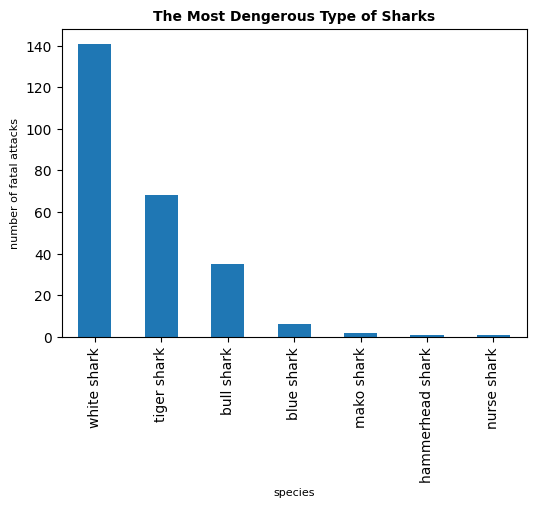

In [654]:
#visualizing data on a bar chart to have a better understanding of result
fatal_sharks.plot( kind = "bar", figsize = (6,4), )
plt.xlabel('species',fontsize=8)
plt.ylabel('number of fatal attacks', fontsize=8)
plt.title('The Most Dengerous Type of Sharks', fontsize=10, fontweight='bold')
plt.legend().remove()
plt.show()



---



# **2- Are children more likely to be attacked by sharks?**

To answer this question, we need to establish a specific age range that qualifies as "children" Once we define this age range, we can examine the number of shark attacks that occurred within that particular age group.

By comparing the frequency of shark attacks for children to adults, we can determine if children are more susceptible to shark attacks.

'Age' < 18 : Children

'Age' > = 18 : Adult

In [629]:
#looking at the values inside age column
new_df['age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [630]:
#cleaning the age column to handle the question as precice as possible
#removing extra spaces, and changing the values to lowercase
def clean_age(new_df):
  new_df['age'] = new_df['age'].str.strip().str.rstrip('').str.rstrip('s').str.rstrip("'").str.strip('"').str.strip('()').str.lower()
  return new_df

clean_age(new_df)

case number         date    year        type             country  \
0     2018.06.25  25-Jun-2018  2018.0     Boating                 USA   
1     2018.06.18  18-Jun-2018  2018.0  Unprovoked                 USA   
2     2018.06.09  09-Jun-2018  2018.0     Invalid                 USA   
3     2018.06.08  08-Jun-2018  2018.0  Unprovoked           AUSTRALIA   
4     2018.06.04  04-Jun-2018  2018.0    Provoked              MEXICO   
...          ...          ...     ...         ...                 ...   
6297     ND.0005  Before 1903     0.0  Unprovoked           AUSTRALIA   
6298     ND.0004  Before 1903     0.0  Unprovoked           AUSTRALIA   
6299     ND.0003    1900-1905     0.0  Unprovoked                 USA   
6300     ND.0002    1883-1889     0.0  Unprovoked              PANAMA   
6301     ND.0001    1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                   area                             location      activity  \
0            California          Oceanside, San Diego County      Paddling   
1               Georgia       St. Simon Island, Glynn County      Standing   
2                Hawaii                         Habush, Oahu       Surfing   
3       New South Wales                   Arrawarra Headland       Surfing   
4                Colima                             La Ticla   Free diving   
...                 ...                                  ...           ...   
6297  Western Australia                          Roebuck Bay        Diving   
6298  Western Australia                                  NaN  Pearl diving   
6299     North Carolina                       Ocracoke Inlet      Swimming   
6300                NaN                 Panama Bay 8ºN, 79ºW           NaN   
6301   Eastern Province  Below the English fort, Trincomalee      Swimming   

                       name sex  age  \
0               Julie Wolfe   F   57   
1           Adyson McNeely    F   11   
2               John Denges   M   48   
3                      male   M  NaN   
4            Gustavo Ramos    M  NaN   
...                     ...  ..  ...   
6297                   male   M  NaN   
6298                  Ahmun   M  NaN   
6299  Coast Guard personnel   M  NaN   
6300        Jules Patterson   M  NaN   
6301                   male   M   15   

                                                 injury fatal(y/n)  \
0     No injury to occupant, outrigger canoe and pad...          N   
1                            Minor injury to left thigh          N   
2          Injury to left lower leg from surfboard skeg          N   
3                             Minor injury to lower leg          N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT          N   
...                                                 ...        ...   
6297                                              FATAL          Y   
6298                                              FATAL          Y   
6299                                              FATAL          Y   
6300                                              FATAL          Y   
6301  FATAL. "Shark bit him in half, carrying away t...          Y   

               time          species  new_species  
0             18h00      white shark  white shark  
1     14h00  -15h00              NaN      unknown  
2             07h45              NaN      unknown  
3               NaN        2 m shark      unknown  
4               NaN  tiger shark, 3m  tiger shark  
...             ...              ...          ...  
6297            NaN              NaN      unknown  
6298            NaN              NaN      unknown  
6299            NaN              NaN      unknown  
6300            NaN              NaN      unknown  
6301            NaN              NaN      unknown  

[6302 rows x 16 columns]

To find the answer as accurate as possible we organised the ages:

1. Replaced the decade with a number in the range of the decade(without making a bias)
2. Separated the unusual entries with length more than two
3. Looked into the separated data and grouped the ones with ‘or’ and ‘to’ in one group
4. Replaced this group with the mean value of the numbers before and after or/to.
5. Separated the entries that contain “&” and stored them all in a vector.
6. Added the estimated values of the “or/to” to the list of normal ages.
7. Attached the vector created in step 5 to this list of ages.


Now we have one unbiased vector of data that we can use to check the condition >18 or <= 18

In [631]:
#adding a new column to dataframe
new_df['new_age'] = None

#identifying the values that can't give us infromation and changing them to unknown ('make line green','x', 'teen', '?', 'f', 'a.m.', 'young')
# age from 13-19 considered to be teenager, for this reason it doesn't give us accurate information, so as value 'young' , it can create bias.
ages_to_replace = ["make line green","x", "teen", "f", "a.m.", "young"]
new_df['new_age'] = new_df['age'].replace(ages_to_replace, "unknown").str.strip()

#estimating some values that are containing clear information and  don't make bias on our results, such as 'mid-30', 'elderly','adult', 'mid-20', 'ca. 33', 'middle-age', '18 month', '20?', '2 to 3 month':
estimating_age = {
    'mid-30': '35',
    'mid-20': '25',
    '20?': '25',
    'ca. 33': '33',
    'both 11': '11 & 11',
    '2 to 3 month': '1',
    '18 month': '1½',
    '9 month': '1',
    'adult': '40',
    '>50': '50',
    'middle-age': '50',
    'elderly': '60'
}
new_df['new_age'] = new_df['new_age'].replace(estimating_age)

new_df['new_age'].unique()


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', 'unknown', '47', '61',
       '65', '36', '66', '43', '9', '72', '59', '6', '27', '64', '23',
       '71', '44', '62', '63', '70', '1½', '53', '77', '74', '28 & 26',
       '5', '86', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       '36 & 26', '8 or 10', '84', '', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', '23 & 20', '7      &    31', '32 & 30', '16 to 18',
       '87', '67', '21 or 26', '18 to 22', '9 & 12', '? & 19', '1',
       '25 to 35', '23 & 26', '33 & 37', '25 or 28',
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30',
       '17 & 35', '13 or 18', '34 & 19', '33 & 26', '81', '7 or 8', '78',
       '17 & 16'

In [632]:
#filtering values to extract the rest of odd values:
filtered_age = new_df['new_age'][new_df['new_age'].str.len() > 2]

#estimating ages for values with 'or' and 'to'( they do not make difference on our final analysis)
def calculate_mean(x):
    means = []
    for age in x:
      if age == '13 or 18': #converting to NaN, as it can create bias due to missed information in case of it is 18, it will change our results
        means.append('unknown')
      else:
        values = np.array(age.replace('to', '|').replace('or', '|').split('|')).astype(int)
        mean = np.mean(values)
        means.append(mean)
    return means

#dividing the filtered_age to 2 lists:
contains_or_to = []
contains_and = []

for age in filtered_age:
     if 'or' in age or 'to' in age:
       contains_or_to.append(age)
     elif '&' in age:
       contains_and.append(age)

print(contains_or_to)
print(contains_and)

estimate_or_to = calculate_mean(contains_or_to)
estimate_or_to

def extract_ages(string):
    # Use regular expression to extract all ages in the string
    ages = re.findall(r'\d+', string)
    # Convert the extracted numbers to integers
    ages = [int(num) for num in ages]
    return ages

# Extract ages from the list elements
separated_ages = [extract_ages(age) for age in contains_and]

# Flatten the list of multi_ages
multi_ages = [num for sublist in separated_ages for num in sublist]
print(multi_ages)
print(estimate_or_to)


['18 or 20', '12 or 13', '8 or 10', '30 or 36', '33 or 37', '16 to 18', '21 or 26', '18 to 22', '25 to 35', '25 or 28', '13 or 18', '7 or 8', '8 or 10', '9 or 10', '10 or 12', '31 or 33', '7 or 8', '13 or 14']
['28 & 26', '46 & 34', '28, 23 & 30', '36 & 26', '21 & ?', '23 & 20', '7      &    31', '32 & 30', '9 & 12', '? & 19', '23 & 26', '33 & 37', '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30', '17 & 35', '34 & 19', '33 & 26', '17 & 16', '11 & 11', '36 & 23', '?    &   14']
[28, 26, 46, 34, 28, 23, 30, 36, 26, 21, 23, 20, 7, 31, 32, 30, 9, 12, 19, 23, 26, 33, 37, 37, 67, 35, 27, 27, 21, 34, 24, 35, 30, 32, 50, 30, 17, 35, 34, 19, 33, 26, 17, 16, 11, 11, 36, 23, 14]
[19.0, 12.5, 9.0, 33.0, 35.0, 17.0, 23.5, 20.0, 30.0, 26.5, 'unknown', 7.5, 9.0, 9.5, 11.0, 32.0, 7.5, 13.5]


In [633]:
new_df['new_age'] = new_df['new_age'].replace(contains_or_to, estimate_or_to)
new_df['new_age'] = new_df['new_age'].replace(contains_and, np.nan)

new_df['new_age'].unique()

#new_df['new_age'].fillna('unknown')
#new_df['new_age'].value_counts()
#new_df['new_age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', 'unknown', '47', '61',
       '65', '36', '66', '43', '9', '72', '59', '6', '27', '64', '23',
       '71', '44', '62', '63', '70', '1½', '53', '77', '74', '5', '86',
       19.0, 12.5, 9.0, '84', '', 33.0, '6½', '75', 35.0, 17.0, '87',
       '67', 23.5, 20.0, '1', 30.0, 26.5, '81', 7.5, '78', 9.5, 11.0,
       32.0, '2½', 13.5], dtype=object)

In [634]:
ages_list  = new_df['new_age'].tolist()
#print(ages_list)
ages_counting = ages_list + multi_ages
ages_counting = pd.to_numeric(ages_counting, errors='coerce')
#print(ages_counting)
df_age = pd.DataFrame({'df_age': ages_counting})
df_age = df_age.dropna()
df_age.columns = ['age']
df_age[~(df_age['age'] == 'NA')]


age
0     57.0
1     11.0
2     48.0
6     18.0
7     52.0
...    ...
6346  11.0
6347  11.0
6348  36.0
6349  23.0
6350  14.0

[3467 rows x 1 columns]

In [635]:

#filtering by <18 and >=18 to see how many attacks were on children and how many on adults
#children_filter = df_age.groupby[df_age['age'] < 18]

ages_group = df_age.groupby('age')
children_filter = ages_group.filter(lambda x: x['age'].max() < 18)
children_filter.value_counts()
adult_filter = ages_group.filter(lambda x: x['age'].max() >= 18)
print(children_filter.value_counts())
print(adult_filter.value_counts())

age 
17.0    157
16.0    139
15.0    139
14.0    102
13.0     94
12.0     74
10.0     56
11.0     40
9.0      38
8.0      28
7.0      23
6.0      14
5.0       7
3.0       5
1.0       4
7.5       2
9.5       1
12.5      1
13.5      1
dtype: int64
age 
20.0    151
18.0    150
19.0    145
21.0    121
22.0    117
       ... 
81.0      1
82.0      1
84.0      1
86.0      1
87.0      1
Length: 67, dtype: int64


In [636]:

children_attacks = sum(children_filter.value_counts())
adult_attacks = sum(adult_filter.value_counts())
total_attacks = children_attacks + adult_attacks
print(children_attacks)
print(adult_attacks)
total_attack = {'age_range': ['children', 'adults'],
                'counts': [children_attacks , adult_attacks ]
                }

#creating the newdataframe to show the result:
age_range_attacks = pd.DataFrame(total_attack)
age_range_attacks


925
2542


age_range  counts
0  children     925
1    adults    2542

as you can see in the table above, the frequency of attacks on children (age < 18 ) are less than for adults.


# **children 925 attacks**
# **adults 2542 attacks**

For better understanding, we visualize our results in a pie chart.

**Age Range Attacks-chart**

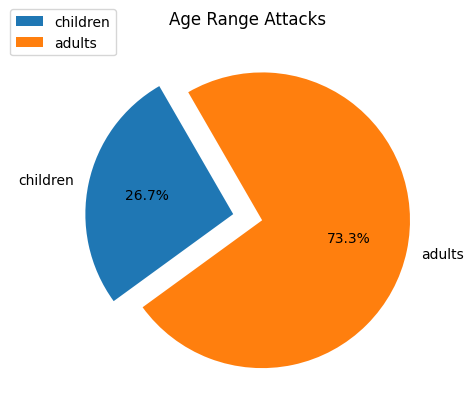

In [637]:
explode = [ 0.1, 0.1]
plt.pie(age_range_attacks['counts'], labels = age_range_attacks['age_range'] , autopct='%1.1f%%', startangle= 120, explode = explode)
plt.title('Age Range Attacks')
plt.legend(age_range_attacks['age_range'], loc='center', bbox_to_anchor=(0,1) )
plt.show()



---



# **3- Are shark attacks where sharks were provoked more or less dangerous?**

To answer this question, we can compare the frequency of fatal attacks among provoked attacks with the frequency of fatal attacks among other types of attacks.

First, we need to calculate the number of fatal attacks when provoked attacks happend. We can filter the DataFrame where the 'fatal' is 'yes' and then filter the provoked attacks  and clculate the proportion within this subset.

Next, we calculate the number of none-provoked attacks in the same subset and calculating the proportion of fatal attacks.

Finally, we compare the two proportions to see if provoked attacks have a higher proportion of fatal attacks compared to other types.

In [638]:
#looking at the type of values in 'type' column
new_df['type'].unique()
new_df['type'].value_counts()


Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [639]:
#cleaning 'type' column:
#adding a new column to dataframe
new_df['new_type'] = new_df['type']
#1.values like 'Invalid' and 'Questionable' are missing ,as a result we convert them into NaN value
#inavlids_to_replace = ['Invalid', 'Questionable']
#new_df['new_type'] = new_df['new_type'].replace( invalids_to_replace, np.nan)
new_df.loc[(new_df['new_type'] == 'Questionable') ,"new_type"] = 'Invalid'
#2.Since we want a general proportion of attacks between provoked and others we put all the values like 'Boating', 'Boat', 'Boatomg' and ' sea disaster' as 'unprovoked':
new_df.loc[(new_df['new_type'] == 'Boat') | (new_df['new_type'] == 'Boatomg') | (new_df['new_type'] == 'Boating') | (new_df['new_type'] == 'Sea Disaster'), "new_type"] = "unprovoked"
new_df['new_type'] = new_df['new_type'].str.lower()
new_df['new_type'].value_counts()


unprovoked    5175
provoked       574
invalid        549
Name: new_type, dtype: int64

In [640]:
#as requested in the question , we need to compare if the provoked attacks were more dangerous
#to do this we can see how many fatal attacks happend (fatal(y/n) = y) and see how much of the all of the attacks were provoked compare to other types.
#filtering out dataframe by 'fatal(y/n)', 'type'
filter_type_fatal = new_df.loc[:, ['fatal(y/n)', 'new_type'] ]
#filtering new data where the atack is fatal
fatal_yes = filter_type_fatal[filter_type_fatal['fatal(y/n)'] == 'Y']
fatal_yes

#filtering attacks using .groupby and counting the frequency of each type of attacks in a new dataframe
fatal_type_attacks = fatal_yes.groupby (['new_type']).agg(counts=('new_type', 'size')).reset_index(names=['type', 'counts'] )
fatal_type_attacks

type  counts
0     invalid       8
1    provoked      19
2  unprovoked    1360

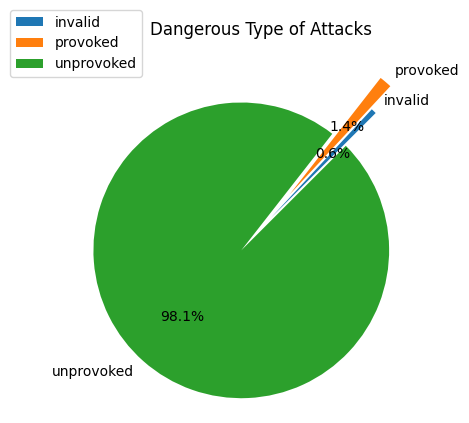

In [641]:
explode = [ 0.1, 0.3, 0.2]
plt.pie(fatal_type_attacks['counts'], labels = fatal_type_attacks['type'] , autopct='%1.1f%%', startangle= 45, explode = explode)
plt.title('Dangerous Type of Attacks')
plt.legend(fatal_type_attacks['type'], loc='center', bbox_to_anchor=(0,1) )
plt.show()

As we can see on the pie chart aswell as the dataframe, only 1.4% of the fatal attacks were provoked. This goes to show that most of the attacks resulting in death were unprovoked.




---



# **4- Are certain activities more likely to result in a shark attack?**

To find the answer, we can have a look at the values in the 'activity' column and determine how many times each activity happened.

First, we need to clean and organise our activity column values.

Next, we can use the groupby() function to group the DataFrame by the 'activity' column and count the amount of time attack happened for each activity.

Finally, by sorting the data according to the counts, and using head we can see the top 10 activities which had the most attacks.

In [642]:
#looking at the values inside the column activity
new_df['activity']
new_df['activity'].value_counts().head(20)

Surfing            971
Swimming           869
Fishing            431
Spearfishing       333
Bathing            162
Wading             149
Diving             127
Standing            99
Snorkeling          89
Scuba diving        76
Body boarding       61
Body surfing        49
Swimming            47
Kayaking            33
Treading water      32
Pearl diving        32
Fell overboard      32
Free diving         29
Boogie boarding     29
Windsurfing         19
Name: activity, dtype: int64

In [643]:
#cleaning 'activity' column:
def clean_activity(new_df):
  new_df['activity'] = new_df['activity'].str.strip().str.rstrip('').str.lower()
  return new_df

clean_activity(new_df)

case number         date    year        type             country  \
0     2018.06.25  25-Jun-2018  2018.0     Boating                 USA   
1     2018.06.18  18-Jun-2018  2018.0  Unprovoked                 USA   
2     2018.06.09  09-Jun-2018  2018.0     Invalid                 USA   
3     2018.06.08  08-Jun-2018  2018.0  Unprovoked           AUSTRALIA   
4     2018.06.04  04-Jun-2018  2018.0    Provoked              MEXICO   
...          ...          ...     ...         ...                 ...   
6297     ND.0005  Before 1903     0.0  Unprovoked           AUSTRALIA   
6298     ND.0004  Before 1903     0.0  Unprovoked           AUSTRALIA   
6299     ND.0003    1900-1905     0.0  Unprovoked                 USA   
6300     ND.0002    1883-1889     0.0  Unprovoked              PANAMA   
6301     ND.0001    1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                   area                             location      activity  \
0            California          Oceanside, San Diego County      paddling   
1               Georgia       St. Simon Island, Glynn County      standing   
2                Hawaii                         Habush, Oahu       surfing   
3       New South Wales                   Arrawarra Headland       surfing   
4                Colima                             La Ticla   free diving   
...                 ...                                  ...           ...   
6297  Western Australia                          Roebuck Bay        diving   
6298  Western Australia                                  NaN  pearl diving   
6299     North Carolina                       Ocracoke Inlet      swimming   
6300                NaN                 Panama Bay 8ºN, 79ºW           NaN   
6301   Eastern Province  Below the English fort, Trincomalee      swimming   

                       name sex  age  \
0               Julie Wolfe   F   57   
1           Adyson McNeely    F   11   
2               John Denges   M   48   
3                      male   M  NaN   
4            Gustavo Ramos    M  NaN   
...                     ...  ..  ...   
6297                   male   M  NaN   
6298                  Ahmun   M  NaN   
6299  Coast Guard personnel   M  NaN   
6300        Jules Patterson   M  NaN   
6301                   male   M   15   

                                                 injury fatal(y/n)  \
0     No injury to occupant, outrigger canoe and pad...          N   
1                            Minor injury to left thigh          N   
2          Injury to left lower leg from surfboard skeg          N   
3                             Minor injury to lower leg          N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT          N   
...                                                 ...        ...   
6297                                              FATAL          Y   
6298                                              FATAL          Y   
6299                                              FATAL          Y   
6300                                              FATAL          Y   
6301  FATAL. "Shark bit him in half, carrying away t...          Y   

               time          species  new_species new_age    new_type  
0             18h00      white shark  white shark      57  unprovoked  
1     14h00  -15h00              NaN      unknown      11  unprovoked  
2             07h45              NaN      unknown      48     invalid  
3               NaN        2 m shark      unknown     NaN  unprovoked  
4               NaN  tiger shark, 3m  tiger shark     NaN    provoked  
...             ...              ...          ...     ...         ...  
6297            NaN              NaN      unknown     NaN  unprovoked  
6298            NaN              NaN      unknown     NaN  unprovoked  
6299            NaN              NaN      unknown     NaN  unprovoked  
6300            NaN              NaN      unknown     NaN  unprovoked  
6301            NaN              NaN      unknown      15  unprovoked  

[630

In [644]:
top_10_activities = new_df.groupby(['activity']).agg({'activity':'count'})
top_10_activities = top_10_activities.rename(columns={'activity': 'number of attacks'})
top_10_activities = top_10_activities.sort_values('number of attacks', ascending=False). head(10)
top_10_activities

number of attacks
activity                       
surfing                     976
swimming                    916
fishing                     444
spearfishing                340
bathing                     165
wading                      149
diving                      130
standing                    101
scuba diving                 91
snorkeling                   89

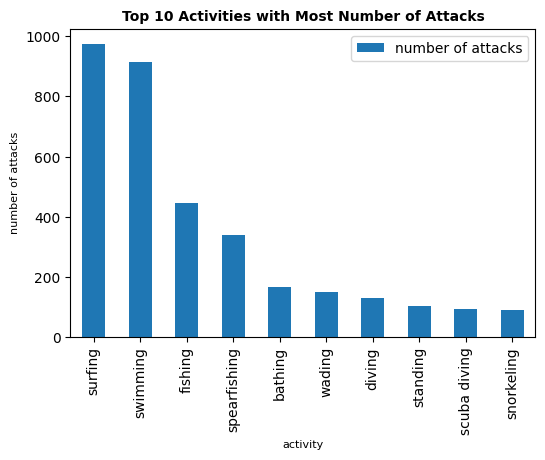

In [645]:
#visualizing data on a bar chart to have a better understanding of result

top_10_activities.plot(kind='bar', figsize=(6,4 ))
plt.xlabel('activity',fontsize=8)
plt.ylabel('number of attacks', fontsize=8)
plt.title('Top 10 Activities with Most Number of Attacks', fontsize=10, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

Looking at the bar chart and table above, it becomes clear according to our dataset that certain activities, such as **Surfing**, **Swimming** and **fishing** are at higher risk for shark attacks. As a result it can be concluded that these activities are more likely to encounter shark attacks.
